In [1]:
%matplotlib inline
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
import more_itertools as mit
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack


  python               : 2.7.16
  pythonpath           : 
  virtualenv           : radical.analytics

  radical.analytics    : v0.50.0-10-g76b5950@devel
  radical.entk         : 0.7.8
  radical.pilot        : 0.50.16
  radical.utils        : 0.50.2
  saga                 : 0.50.0



In [2]:
images = pd.read_csv('../Data/Des3Images.csv')
train_des2_tilling = pd.DataFrame(columns=['Image','Size','Time'])

sids = ['../Data/Design3Run2_2','../Data/Design1M5'] 
for sid in sids:
    tiling_files = glob(sid+'/pilot.0000/unit.00*/tilling*.csv')
    for tiling_file in tiling_files:
        Tilling = pd.read_csv(tiling_file)
        for index, row in Tilling.iterrows():
            try:
                image = row['Image'].split('/')[-1]
                size = int(images.loc[images['Filename'] == row['Image']]['Size'].values[0])
                time = row['End'] - row['Start']
                train_des2_tilling.loc[len(train_des2_tilling)] = [image,size,time]
            except:
                print row['Image']

        
train_des2_tilling_binned = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    train_des2_tilling_binned.loc[len(train_des2_tilling_binned)] = [[i, i + 125],train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Size'].values,
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Size'].values.mean(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Size'].values.std(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Size'].values.min(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Size'].values.max(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Time'].values,
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Time'].values.mean(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Time'].values.std(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Time'].values.min(),
                                                                                  train_des2_tilling[(i < train_des2_tilling['Size']) & (train_des2_tilling['Size']< (i + 125))]['Time'].values.max()]

In [3]:
images = pd.read_csv('../Data/Des3Images.csv')
train_des2_pred = pd.DataFrame(columns=['Image','Size','Time'])
path = '/pylon5/mc3bggp/bspitz/Seals/'

sids = ['../Data/Design1M5','../Data/Design3Run2_2'] 
for sid in sids:
    tiling_files = glob(sid+'/pilot.0000/unit.00*/pred*.csv')
    for tiling_file in tiling_files:
        Tilling = pd.read_csv(tiling_file)
        for index, row in Tilling.iterrows():
            try:
                image = row['Image']
                abs_name = path + row['Image'] + '.tif'
                size = int(images.loc[images['Filename'] == abs_name]['Size'].values[0])
                time = row['End'] - row['Start']
                train_des2_pred.loc[len(train_des2_pred)] = [image,size,time]
            except:
                print abs_name


train_des2_pred_binned = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    train_des2_pred_binned.loc[len(train_des2_pred_binned)] = [[i, i + 125],train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Size'].values,
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Size'].values.mean(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Size'].values.std(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Size'].values.min(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Size'].values.max(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Time'].values,
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Time'].values.mean(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Time'].values.std(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Time'].values.min(),
                                                                                  train_des2_pred[(i < train_des2_pred['Size']) & (train_des2_pred['Size']< (i + 125))]['Time'].values.max()]

In [6]:
def func_lin(x, a, b):
    return a * x + b

xdata = train_des2_tilling_binned['SizeMean'].values[4:19]
ydata = train_des2_tilling_binned['TimeMean'].values[4:19]
poptTillingDes1lin, pcovTillingDes1lin = curve_fit(func_lin,xdata,ydata)
y = func_lin(xdata, *poptTillingDes1lin)
s_test = np.sqrt(np.sum(np.power((train_des2_tilling_binned['TimeMean'].values[4:19] - y), 2))/(len(y)-2))
print 'Linear: R-squared', r2_score(train_des2_tilling_binned['TimeMean'].values[4:19],y), '$S_{error}$', s_test
print 'Parameter Values', poptTillingDes1lin

Linear: R-squared 0.9173848221904178 $S_{error}$ 5.496694974632333
Parameter Values [3.17470564e-02 6.46812975e+01]


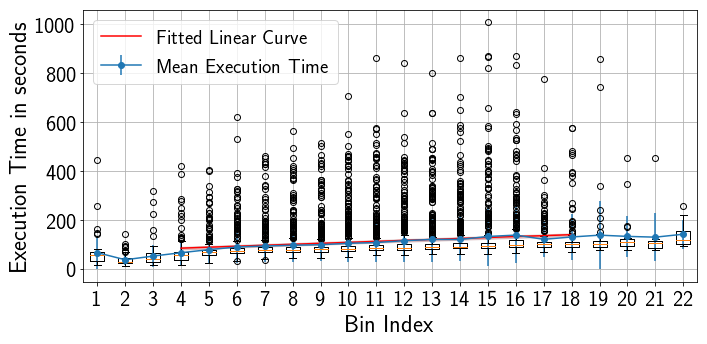

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,5),sharey='row')
_ = axis.boxplot(train_des2_tilling_binned['TimeArray'].values)
_ = axis.errorbar(range(1,23),train_des2_tilling_binned['TimeMean'].values,yerr=train_des2_tilling_binned['TimeStd'].values,marker='o',label='Mean Execution Time')
_ = axis.plot(range(4,19), y, 'r-', label="Fitted Linear Curve")
_ = axis.fill_between(range(4,19),y - s_test, y + s_test, color=reds(250), alpha=0.2)
_ = axis.set_ylabel('Execution Time in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
# fig.savefig('stage_0_tx_box_des2.pdf',dpi=800,bbox_inches='tight')

In [10]:
def func_lin(x, a, b):
    return a * x + b

xdata = train_des2_pred_binned['SizeMean'].values[4:19]
ydata = train_des2_pred_binned['TimeMean'].values[4:19]
poptPredDes1lin, pcovPredDes1lin = curve_fit(func_lin,xdata,ydata)
y = func_lin(xdata, *poptPredDes1lin)
s_test = np.sqrt(np.sum(np.power((train_des2_pred_binned['TimeMean'].values[4:19] - y), 2))/(len(y)-2))
print 'Linear: R-squared', r2_score(train_des2_pred_binned['TimeMean'].values[4:19],y), '$S_{error}$', s_test
print 'Parameter Values', poptPredDes1lin

Linear: R-squared 0.9541633122307643 $S_{error}$ 5.960059379846854
Parameter Values [4.71315045e-02 9.58382425e+01]


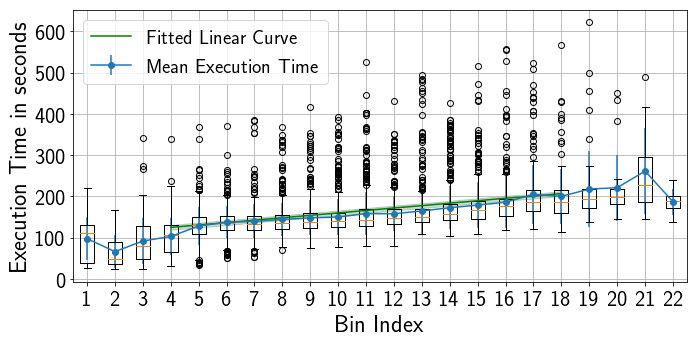

In [11]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,5),sharey='row')
_ = axis.boxplot(train_des2_pred_binned['TimeArray'].values)
_ = axis.errorbar(range(1,23),train_des2_pred_binned['TimeMean'].values,yerr=train_des2_pred_binned['TimeStd'].values,marker='o',label='Mean Execution Time')
_ = axis.plot(range(4,19), y, 'g-', label="Fitted Linear Curve")
_ = axis.fill_between(range(4,19),y - s_test, y + s_test, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Execution Time in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
# fig.savefig('stage_1_tx_box_des2.pdf',dpi=800,bbox_inches='tight')
